# RocketML text topic modeling using SVD
## Import Libraries

In [2]:
!pip install --user seaborn

    100% |████████████████████████████████| 204kB 3.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
Successfully built seaborn
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from rocketml.io import DocumentSet
from rocketml.decomposition import TruncatedSVD
from rocketml.preprocessing import TextFilter
from rocketml import Pipeline
import sys
import pandas as pd
import seaborn as sns

from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.ranges import Range1d

%matplotlib inline

## Create Document Set

In [4]:
filename = "/home/ubuntu/examples/345_blogs_list.txt"
docset = DocumentSet(filename=filename)
tf = TextFilter(stop_word_filter=True,stemming_filter=True,length_filter=True)
svd = TruncatedSVD()
pipeline = Pipeline([tf,svd])
pipeline.fit(docset)
len(docset.documents)

text
/tmp/jobs_folder/48e37f76/output.txt


137

## Plot Singular Values

/home/ubuntu/.local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


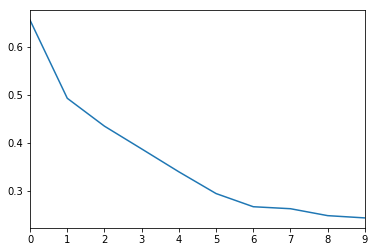

In [5]:
sns.tsplot(svd.singular_values_)

## Check term frequencies

In [6]:
df = pd.DataFrame([[key,value] for key,value in docset.terms_document_frequencies.iteritems()],columns=["Term","Frequency"])

In [7]:
df_high = df[df["Frequency"] > 120].sort_values(by=["Frequency"],ascending=False)

## Plot term frequencies using bokeh

In [8]:
output_notebook()

Loading BokehJS ...

In [9]:
source = ColumnDataSource(df_high)

In [10]:
p = figure(plot_width=1000,plot_height=500,title="Term Frequencies",x_range=df_high["Term"].values,y_range=Range1d(0,df_high["Frequency"].max()))
p.vbar(x="Term",top = "Frequency",width=0.2,source=source)
p.add_tools(HoverTool(tooltips=[("Term","@Term"),("Frequency","@Frequency")]))
show(p)